### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Import and read the charity_data.csv:
import pandas as pd 
application_df = pd.read_csv("/Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/neural-network-charity-analysis/Challenge 19/data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME':
application_df = application_df.drop(columns=["EIN", "NAME"])

In [3]:
# Determine the number of unique values in each column:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning:
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

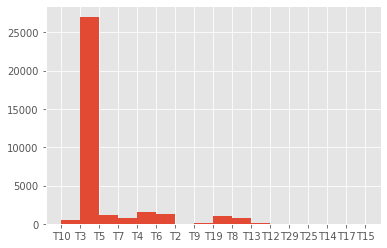

In [5]:
# Visualize the value counts of APPLICATION_TYPE:
plt.hist(application_df.APPLICATION_TYPE, bins=application_df.APPLICATION_TYPE.unique())
plt.show()

In [6]:
# Determine which values to replace if counts are less than ...?:
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe:
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful:
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

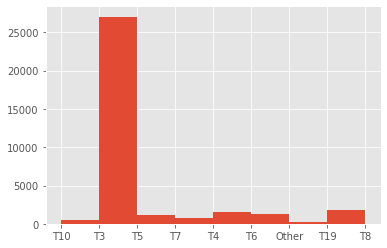

In [7]:
# Visualize the value counts of APPLICATION_TYPE:
plt.hist(application_df.APPLICATION_TYPE, bins=application_df.APPLICATION_TYPE.unique())
plt.show()

In [8]:
# Look at CLASSIFICATION value counts for binning:
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1570        1
C2150        1
C4500        1
C2570        1
C1900        1
Name: CLASSIFICATION, Length: 71, dtype: int64

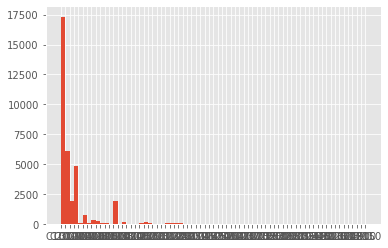

In [9]:
# Visualize the value counts of CLASSIFICATION:
plt.hist(application_df.CLASSIFICATION, bins=application_df.CLASSIFICATION.unique())
plt.show()

In [10]:
# Determine which values to replace if counts are less than ..?:
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe:
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful:
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

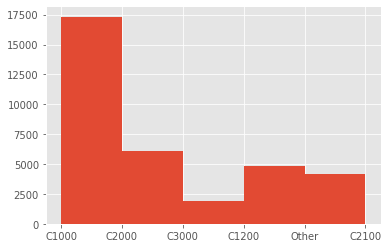

In [11]:
# Visualize the value counts of CLASSIFICATION:
plt.hist(application_df.CLASSIFICATION, bins=application_df.CLASSIFICATION.unique())
plt.show()

In [12]:
# Generate our categorical variable lists:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [13]:
# Create a OneHotEncoder instance:
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list:
encoded_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe:
encoded_df.columns = enc.get_feature_names(application_cat)
encoded_df.head()

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals:
application_df = application_df.merge(encoded_df, left_index=True, right_index=True)
application_df = application_df.drop(columns=application_cat)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays:
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, stratify=y)

In [16]:
# Create a StandardScaler instances:
scaler = StandardScaler()

# Fit the StandardScaler:
X_scaler = scaler.fit(X_train)

# Scale the data:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer:
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer:
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer:
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "/Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/neural-network-charity-analysis/Challenge 19/py/checkpoints/weights.{epoch:02d}.hdf5"
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

In [19]:
# Train the model:
fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 31426.6367 - accuracy: 0.4955
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 34857.1094 - accuracy: 0.5124
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 34183.2500 - accuracy: 0.4677
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 4966.3848 - accuracy: 0.4678
Epoch 5/100
801/804 [============================>.] - ETA: 0s - loss: 0.8938 - accuracy: 0.5322
Epoch 5: saving model to /Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/neural-network-charity-analysis/Challenge 19/py/checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.8933 - accuracy: 0.5324
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.7810 - accuracy: 0.5324
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.7192 - accuracy: 0.5324
Epoch 8/

804/804 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 55/100
781/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 55: saving model to /Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/neural-network-charity-analysis/Challenge 19/py/checkpoints/weights.55.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 56/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 57/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 58/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 59/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5324
Epoch 60/100
787/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 60: saving model to /Users

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.8072 - accuracy: 0.5324 - 463ms/epoch - 2ms/step
Loss: 0.807216227054596, Accuracy: 0.5323615074157715
